In [48]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
file_path = "survey.csv"
data = pd.read_csv(file_path)
data.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [52]:
data_clean = data.drop(columns=["Timestamp", "comments", "state"])

data_clean['Gender'] = data_clean['Gender'].str.lower().str.strip()
data_clean['Gender'] = data_clean['Gender'].replace({
    'male': 'male', 'm': 'male', 'man': 'male', 'cis male': 'male',
    'female': 'female', 'f': 'female', 'woman': 'female', 'cis female': 'female',
    'trans female': 'trans', 'trans male': 'trans', 'genderqueer': 'other',
    'non-binary': 'other', 'agender': 'other', 'other': 'other'
})
data_clean['Gender'] = data_clean['Gender'].apply(lambda x: 'other' if x not in ['male', 'female'] else x)

data_clean = data_clean.dropna(subset=['treatment'])
data_clean = data_clean.fillna(data_clean.mode().iloc[0])

label_encoders = {}
for col in data_clean.columns:
    if data_clean[col].dtype == 'object':
        le = LabelEncoder()
        data_clean[col] = le.fit_transform(data_clean[col])
        label_encoders[col] = le

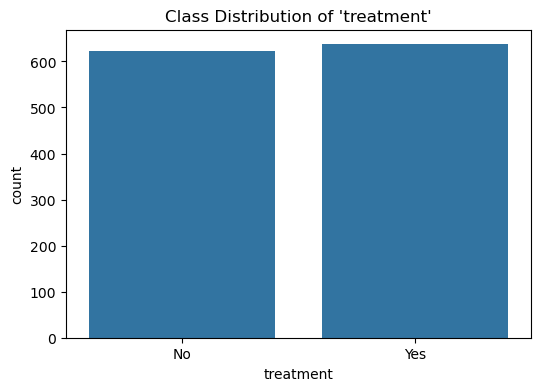

In [54]:
plt.figure(figsize=(6, 4))
sns.countplot(x='treatment', data=data_clean)
plt.title("Class Distribution of 'treatment'")
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

In [56]:
X = data_clean.drop(columns=['treatment'])
y = data_clean['treatment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)
y_pred_tree = decision_tree_model.predict(X_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
classification_report_tree = classification_report(y_test, y_pred_tree)

print("Decision Tree Model Accuracy:", accuracy_tree)
print("Classification Report for Decision Tree:\n", classification_report_tree)

Decision Tree Model Accuracy: 0.626984126984127
Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       0.63      0.67      0.65       129
           1       0.63      0.59      0.61       123

    accuracy                           0.63       252
   macro avg       0.63      0.63      0.63       252
weighted avg       0.63      0.63      0.63       252



In [60]:
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)
y_pred_rf = random_forest_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_report_rf = classification_report(y_test, y_pred_rf)

print("Random Forest Model Accuracy:", accuracy_rf)
print("Classification Report for Random Forest:\n", classification_report_rf)

Random Forest Model Accuracy: 0.753968253968254
Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.76      0.76      0.76       129
           1       0.75      0.75      0.75       123

    accuracy                           0.75       252
   macro avg       0.75      0.75      0.75       252
weighted avg       0.75      0.75      0.75       252



In [62]:
adaboost_model = AdaBoostClassifier(random_state=42)
adaboost_model.fit(X_train, y_train)
y_pred_ab = adaboost_model.predict(X_test)
accuracy_ab = accuracy_score(y_test, y_pred_ab)
classification_report_ab = classification_report(y_test, y_pred_ab)

print("AdaBoost Model Accuracy:", accuracy_ab)
print("Classification Report for AdaBoost:\n", classification_report_ab)

AdaBoost Model Accuracy: 0.7420634920634921
Classification Report for AdaBoost:
               precision    recall  f1-score   support

           0       0.74      0.76      0.75       129
           1       0.74      0.72      0.73       123

    accuracy                           0.74       252
   macro avg       0.74      0.74      0.74       252
weighted avg       0.74      0.74      0.74       252



C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


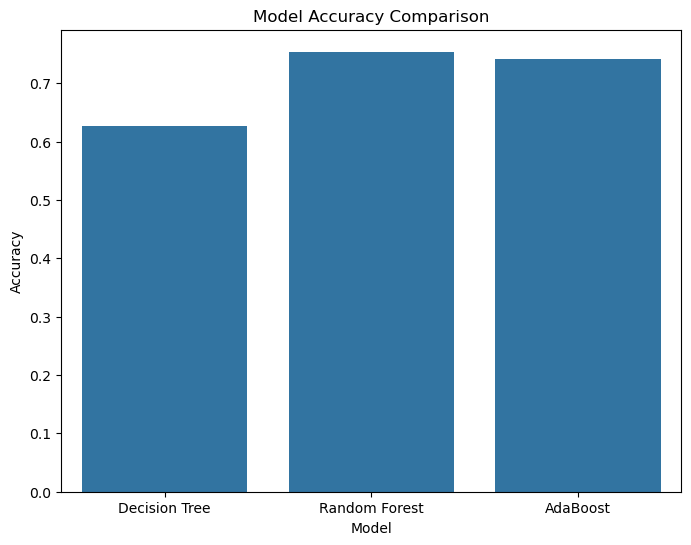

In [64]:
accuracies = [accuracy_tree, accuracy_rf, accuracy_ab]
model_names = ["Decision Tree", "Random Forest", "AdaBoost"]

plt.figure(figsize=(8, 6))
sns.barplot(x=model_names, y=accuracies)
plt.title("Model Accuracy Comparison")
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.show()
